In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Chart	        images.txt   YOLOv3.ipynb
'Chart Ade_9'  'My Drive'    YOLOv_detect_Tutorial_measure_map.ipynb
 darknet.zip    yolov3	     YOLOv_detect_Video._and_images.ipynb


In [3]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/darknet.zip ../

In [4]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../darknet.zip 

Archive:  ../darknet.zip
   creating: darknet/
   creating: darknet/.circleci/
  inflating: darknet/.circleci/config.yml  
   creating: darknet/.github/
  inflating: darknet/.github/FUNDING.yml  
   creating: darknet/.github/ISSUE_TEMPLATE/
  inflating: darknet/.github/ISSUE_TEMPLATE/any-other-question-or-issue.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/bug-report-or-training-issue-.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/bug-report.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/feature_request.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/training-issue---no-detections---nan-avg-loss---low-accuracy.md  
   creating: darknet/.github/workflows/
  inflating: darknet/.github/workflows/ccpp.yml  
  inflating: darknet/.gitignore      
  inflating: darknet/.travis.yml     
   creating: darknet/3rdparty/
   creating: darknet/3rdparty/pthreads/
   creating: darknet/3rdparty/pthreads/bin/
  inflating: darknet/3rdparty/pthreads/bin/pthreadGC2.dll  
  inflating: darknet/3rdpar

In [5]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov4

ls: cannot access '/mydrive/yolov4': No such file or directory


In [6]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [7]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [8]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unuse

# Step 4: Define Helper Functions

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [16]:
# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [21]:
!cp /mydrive/yolov3/backup/yolov3_custom_last.weights ./

In [22]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3//obj.names ./cfg
!cp /mydrive/yolov3/obj.data  ./cfg

!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

!cp /mydrive/yolov3/yolov3_custom.cfg  ./cfg


In [23]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/videos/ADE_9.avi ./

In [24]:
!./darknet detector demo cfg/obj.data cfg/yolov3_custom.cfg yolov3_custom_last.weights -dont_show ADE_9.avi -i 0 -out_filename results.avi

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 

In [25]:
# download the video with detections shown
download('results.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, ou

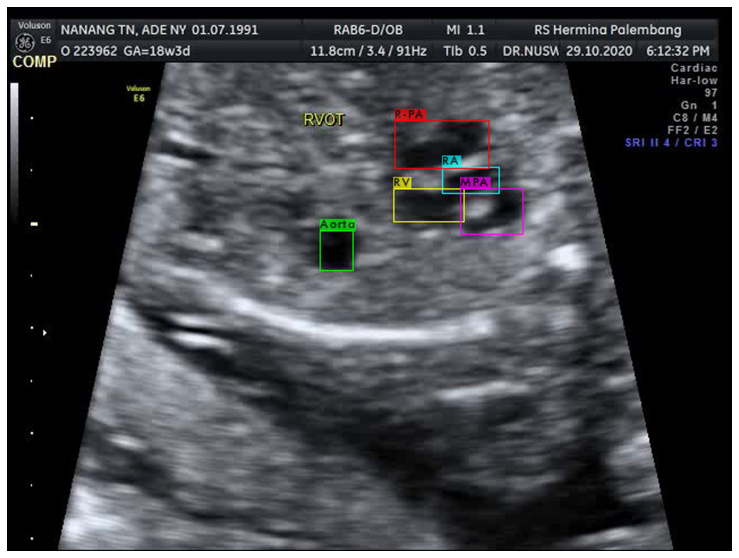

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg yolov3_custom_last.weights /mydrive/images/ADE_9_0.jpg -thresh 0.3 -out_filename results.jpg
imShow('predictions.jpg')
download("predictions.jpg")